In [1]:
setwd('/fs/cbcb-lab/rob/students/noor/Uncertainity/treeTerminusScripts')
suppressPackageStartupMessages(source("tree_helper_function.R"))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(ggpubr))
suppressPackageStartupMessages(library(dplyr))
dir <- "environment/Chimp/mode=gcbias/post_type=gibbs_nrep=100_tf=100/tree_analysis"
gene_dir <- "Chimpanzee/tree_analysis/gene_dir"
load(file.path(dir, "genesCons0.RData"))
load(file.path(dir, "genesCons.RData"))
load(file.path(dir, "genesCor.RData"))
load(file.path(dir, "genesMeanInf0.RData"))
load(file.path(dir, "genesThr.RData"))

In [2]:
suppressPackageStartupMessages(library(biomaRt))
ensembl <- useEnsembl(biomart = "genes", dataset = "ptroglodytes_gene_ensembl", version = 101)

In [3]:
allGenes <- genesCons[[1]]
rGenes <- gsub("\\.[0-9]+", "", allGenes)
# gene_family <- getBM(attributes=c("ensembl_gene_id", "description", "family", "external_gene_name"), values = rGenes, filters="ensembl_gene_id", mart=ensembl)
# save(gene_family, file = file.path(dir, "gene_family_df.RData"))
load(file.path(dir, "gene_family_df.RData"))

In [4]:
length(rGenes) ## All genes in the table
sum(!rGenes %in% gene_family$ensembl_gene_id)

[1] 19720

[1] 0

In [5]:
##Mapping gene to family
geneFam <- lapply(rGenes, function(gene) {
    unique(gene_family[gene_family$ensembl_gene_id==gene,"family"])
})
names(geneFam) <- rGenes
table(sapply(geneFam,length))
geneFam <- lapply(geneFam, function(fams) {
    if(length(fams) > 1)
        fams <- fams[fams!=""]
    fams
})
table(sapply(geneFam,length)) ## Around 430 genes that map to more than 1 family


    1     2     3     4     8     9 
18054  1586    71     7     1     1 


    1     2     3     4     8     9 
19294   403    17     4     1     1 

In [6]:
geneEmptyFam <- rGenes[sapply(geneFam, function(fam) sum(fam == "")==length(fam))]
length(geneEmptyFam)
sum(unlist(geneFam[geneEmptyFam])!="") ## should be 0 so that all empty genes are marked out

[1] 1574

[1] 0

In [7]:
gList <- list(genesCor, genesCons, genesCons0, genesThr, genesMeanInf0)
sapply(gList, length)

[1] 35113 26498 27875  9681 28130

Correlation has the most nodes that have atleast 1 empty gene

In [8]:
for(gL in gList) {
    print(sum(sapply(gL, function(genes) sum(genes %in% geneEmptyFam) > 0)))
}


[1] 4538
[1] 957
[1] 1287
[1] 154
[1] 1400


These nodes will have to removed before considering inner nodes for the distribution of genes

In [9]:
### All Nodes that map entirely to "" families have to be removed
removeNodes <- list()
for(i in seq(gList)) {
    gL <- gList[[i]]
    removeNodes[[i]] <- which(sapply(gL, function(genes) sum(genes %in% geneEmptyFam) == length(genes)))
    removeNodes[[i]] <- c(1, removeNodes[[i]])## Also adding root
}
sapply(removeNodes, length)

[1] 101 472 606 120 706

In [10]:
multiFamGenes <- names(geneFam)[sapply(geneFam,length)>1]
length(multiFamGenes)
l <- length(rGenes)
### nodes that will be considered for hitting set, 
### if there is only 1 gene then we should not be concerned even if a gene is multimapping 
multInds <- lapply(gList, function(gL) {
        which(sapply(gL, function(genes) sum(genes %in% multiFamGenes) > 0 & length(genes) > 1 & l!=length(genes)))
})

sapply(multInds, length)

[1] 426

[1] 3456  173  228   47  243

In [11]:
sapply(seq_along(multInds), function(i) length(intersect(multInds[[i]], removeNodes[[i]]))) ### 0 intersection

[1] 0 0 0 0 0

Only 161 such nodes that too only in correlation that have greater than 200 genes

In [12]:
getInpForHittingSet <- function(genes, geneMap, emptyGeneSet) {
    genes <- setdiff(genes, emptyGeneSet)
    fams <- unique(unlist(geneMap[genes]))
    geneFamsList <- geneMap[genes]
    gsets <- sapply(geneFamsList, function(fam) paste(match(fam, fams), collapse=" "))
    return(gsets)

}

In [56]:
length(multInds[[1]])
fname <- "corHitInp.txt"
gL <- gList[[1]]
cList <- corMultInd
for(i in seq_along(cList)) {
    print(i)
    genes <- gL[[cList[i]]]
    gsets <- getInpForHittingSet(genes, geneFam, geneEmptyFam)
    write(">>>", file.path(gene_dir, fname), append=T)
    for(j in seq_along(gsets)) {
        write(paste(gsets[[j]], collapse=" "), file.path(gene_dir, fname), append=T)
    }
}

[1] 3456

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] 29
[1] 30
[1] 31
[1] 32
[1] 33
[1] 34
[1] 35
[1] 36
[1] 37
[1] 38
[1] 39
[1] 40
[1] 41
[1] 42
[1] 43
[1] 44
[1] 45
[1] 46
[1] 47
[1] 48
[1] 49
[1] 50
[1] 51
[1] 52
[1] 53
[1] 54
[1] 55
[1] 56
[1] 57
[1] 58
[1] 59
[1] 60
[1] 61
[1] 62
[1] 63
[1] 64
[1] 65
[1] 66
[1] 67
[1] 68
[1] 69
[1] 70
[1] 71
[1] 72
[1] 73
[1] 74
[1] 75
[1] 76
[1] 77
[1] 78
[1] 79
[1] 80
[1] 81
[1] 82
[1] 83
[1] 84
[1] 85
[1] 86
[1] 87
[1] 88
[1] 89
[1] 90
[1] 91
[1] 92
[1] 93
[1] 94
[1] 95
[1] 96
[1] 97
[1] 98
[1] 99
[1] 100
[1] 101
[1] 102
[1] 103
[1] 104
[1] 105
[1] 106
[1] 107
[1] 108
[1] 109
[1] 110
[1] 111
[1] 112
[1] 113
[1] 114
[1] 115
[1] 116
[1] 117
[1] 118
[1] 119
[1] 120
[1] 121
[1] 122
[1] 123
[1] 124
[1] 125
[1] 126
[1] 127
[1] 128
[1] 129
[1] 130
[1] 131
[1] 132
[1] 133
[1] 134
[1] 135
[1] 136
[1] 137
[1] 138
[1] 

In [74]:
length(multInds[[2]])
fname <- "consHitInp.txt"
gL <- gList[[2]]
cList <- consMultInd
for(i in seq_along(cList)) {
    print(i)
    genes <- gL[[cList[i]]]
    gsets <- getInpForHittingSet(genes, geneFam, geneEmptyFam)
    write(">>>", file.path(gene_dir, fname), append=T)
    for(j in seq_along(gsets)) {
        write(paste(gsets[[j]], collapse=" "), file.path(gene_dir, fname), append=T)
    }
}

[1] 173

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] 29
[1] 30
[1] 31
[1] 32
[1] 33
[1] 34
[1] 35
[1] 36
[1] 37
[1] 38
[1] 39
[1] 40
[1] 41
[1] 42
[1] 43
[1] 44
[1] 45
[1] 46
[1] 47
[1] 48
[1] 49
[1] 50
[1] 51
[1] 52
[1] 53
[1] 54
[1] 55
[1] 56
[1] 57
[1] 58
[1] 59
[1] 60
[1] 61
[1] 62
[1] 63
[1] 64
[1] 65
[1] 66
[1] 67
[1] 68
[1] 69
[1] 70
[1] 71
[1] 72
[1] 73
[1] 74
[1] 75
[1] 76
[1] 77
[1] 78
[1] 79
[1] 80
[1] 81
[1] 82
[1] 83
[1] 84
[1] 85
[1] 86
[1] 87
[1] 88
[1] 89
[1] 90
[1] 91
[1] 92
[1] 93
[1] 94
[1] 95
[1] 96
[1] 97
[1] 98
[1] 99
[1] 100
[1] 101
[1] 102
[1] 103
[1] 104
[1] 105
[1] 106
[1] 107
[1] 108
[1] 109
[1] 110
[1] 111
[1] 112
[1] 113
[1] 114
[1] 115
[1] 116
[1] 117
[1] 118
[1] 119
[1] 120
[1] 121
[1] 122
[1] 123
[1] 124
[1] 125
[1] 126
[1] 127
[1] 128
[1] 129
[1] 130
[1] 131
[1] 132
[1] 133
[1] 134
[1] 135
[1] 136
[1] 137
[1] 138
[1] 

In [64]:
length(multInds[[3]])
fname <- "cons0HitInp.txt"
gL <- gList[[3]]
cList <- cons0MultInd
for(i in seq_along(cList)) {
    print(i)
    genes <- gL[[cList[i]]]
    gsets <- getInpForHittingSet(genes, geneFam, geneEmptyFam)
    write(">>>", file.path(gene_dir, fname), append=T)
    for(j in seq_along(gsets)) {
        write(paste(gsets[[j]], collapse=" "), file.path(gene_dir, fname), append=T)
    }
}

[1] 228

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] 29
[1] 30
[1] 31
[1] 32
[1] 33
[1] 34
[1] 35
[1] 36
[1] 37
[1] 38
[1] 39
[1] 40
[1] 41
[1] 42
[1] 43
[1] 44
[1] 45
[1] 46
[1] 47
[1] 48
[1] 49
[1] 50
[1] 51
[1] 52
[1] 53
[1] 54
[1] 55
[1] 56
[1] 57
[1] 58
[1] 59
[1] 60
[1] 61
[1] 62
[1] 63
[1] 64
[1] 65
[1] 66
[1] 67
[1] 68
[1] 69
[1] 70
[1] 71
[1] 72
[1] 73
[1] 74
[1] 75
[1] 76
[1] 77
[1] 78
[1] 79
[1] 80
[1] 81
[1] 82
[1] 83
[1] 84
[1] 85
[1] 86
[1] 87
[1] 88
[1] 89
[1] 90
[1] 91
[1] 92
[1] 93
[1] 94
[1] 95
[1] 96
[1] 97
[1] 98
[1] 99
[1] 100
[1] 101
[1] 102
[1] 103
[1] 104
[1] 105
[1] 106
[1] 107
[1] 108
[1] 109
[1] 110
[1] 111
[1] 112
[1] 113
[1] 114
[1] 115
[1] 116
[1] 117
[1] 118
[1] 119
[1] 120
[1] 121
[1] 122
[1] 123
[1] 124
[1] 125
[1] 126
[1] 127
[1] 128
[1] 129
[1] 130
[1] 131
[1] 132
[1] 133
[1] 134
[1] 135
[1] 136
[1] 137
[1] 138
[1] 

In [73]:
length(multInds[[4]])
fname <- "thrHitInp.txt"
gL <- gList[[4]]
cList <- thrMultInd
for(i in seq_along(cList)) {
    print(i)
    genes <- gList[[cList[i]]]
    gsets <- getInpForHittingSet(genes, geneFam, geneEmptyFam)
    write(">>>", file.path(gene_dir, fname), append=T)
    for(j in seq_along(gsets)) {
        write(paste(gsets[[j]], collapse=" "), file.path(gene_dir, fname), append=T)
    }
}

[1] 47

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] 29
[1] 30
[1] 31
[1] 32
[1] 33
[1] 34
[1] 35
[1] 36
[1] 37
[1] 38
[1] 39
[1] 40
[1] 41
[1] 42
[1] 43
[1] 44
[1] 45
[1] 46
[1] 47


In [72]:
length(multInds[[5]])
fname <- "meanHitInp.txt"
gL <- gList[[5]]
cList <- meanMultInd
for(i in seq_along(cList)) {
    print(i)
    genes <- gL[[cList[i]]]
    gsets <- getInpForHittingSet(genes, geneFam, geneEmptyFam)
    write(">>>", file.path(gene_dir, fname), append=T)
    for(j in seq_along(gsets)) {
        write(paste(gsets[[j]], collapse=" "), file.path(gene_dir, fname), append=T)
    }
}

[1] 243

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] 29
[1] 30
[1] 31
[1] 32
[1] 33
[1] 34
[1] 35
[1] 36
[1] 37
[1] 38
[1] 39
[1] 40
[1] 41
[1] 42
[1] 43
[1] 44
[1] 45
[1] 46
[1] 47
[1] 48
[1] 49
[1] 50
[1] 51
[1] 52
[1] 53
[1] 54
[1] 55
[1] 56
[1] 57
[1] 58
[1] 59
[1] 60
[1] 61
[1] 62
[1] 63
[1] 64
[1] 65
[1] 66
[1] 67
[1] 68
[1] 69
[1] 70
[1] 71
[1] 72
[1] 73
[1] 74
[1] 75
[1] 76
[1] 77
[1] 78
[1] 79
[1] 80
[1] 81
[1] 82
[1] 83
[1] 84
[1] 85
[1] 86
[1] 87
[1] 88
[1] 89
[1] 90
[1] 91
[1] 92
[1] 93
[1] 94
[1] 95
[1] 96
[1] 97
[1] 98
[1] 99
[1] 100
[1] 101
[1] 102
[1] 103
[1] 104
[1] 105
[1] 106
[1] 107
[1] 108
[1] 109
[1] 110
[1] 111
[1] 112
[1] 113
[1] 114
[1] 115
[1] 116
[1] 117
[1] 118
[1] 119
[1] 120
[1] 121
[1] 122
[1] 123
[1] 124
[1] 125
[1] 126
[1] 127
[1] 128
[1] 129
[1] 130
[1] 131
[1] 132
[1] 133
[1] 134
[1] 135
[1] 136
[1] 137
[1] 138
[1] 

In [13]:
gnames <- c("Cor","Cons","Cons0","Thr","Mean")
files <- file.path(gene_dir,paste("hit", gnames, ".txt", sep=""))
hitFam <- lapply(files, function(file) read.delim(file, header=F))
names(hitFam) <- gnames

In [14]:
singleGeneInds <- lapply(gList, function(gL) which(sapply(gL, length)==1))
sapply(singleGeneInds,length)
singleGeneInds <- lapply(seq_along(gList), function(i) setdiff(singleGeneInds[[i]], removeNodes[[i]]))
sapply(singleGeneInds,length)

[1] 15785 23238 23787  8804 23934

[1] 15714 22867 23300  8746 23345

In [15]:
geneFamilyLength <- lapply(gList, function(gL) rep(0, length(gL)))
geneFamilyLength <- lapply(seq_along(geneFamilyLength), function(i) {
    gL <- geneFamilyLength[[i]]
    gL[singleGeneInds[[i]]] <- 1
    gL
})

In [16]:
sapply(seq_along(geneFamilyLength), function(i) length(intersect(singleGeneInds[[i]], multInds[[i]])))
geneFamilyLength <- lapply(seq_along(geneFamilyLength), function(i) {
    gL <- geneFamilyLength[[i]]
    inds <- multInds[[i]]
    if(length(inds) == dim(hitFam[[i]])[1])
        gL[inds] <- hitFam[[i]][,1]
    gL
})

[1] 0 0 0 0 0

In [17]:
remInds <- lapply(seq_along(geneFamilyLength), function(i) {
    inds <- setdiff(seq_along(geneFamilyLength[[i]]), 
                    Reduce(union, list(singleGeneInds[[i]], multInds[[i]], removeNodes[[i]])))
})
sapply(remInds,length)

[1] 15842  2986  3741   768  3836

In [18]:
remInds <- lapply(seq_along(geneFamilyLength), function(i) {
    inds <- setdiff(seq_along(geneFamilyLength[[i]]), c(singleGeneInds[[i]], multInds[[i]], removeNodes[[i]]))
    inds <- inds[2:length(inds)] ##dont want root
})
sapply(remInds,length)

[1] 15841  2985  3740   767  3835

In [49]:
sapply(geneFamilyLength,table)

[[1]]

    0     1     2     3     4     5     6     7     8     9    10    11    12 
15943 15774   433   249   327   204   170   155   133   110    93    52    83 
   13    14    15    16    17    18    19    20    21    22    23    24    25 
   65    65    50    51    50    34    38    29    35    38    23    22    35 
   26    27    28    29    30    31    32    33    34    35    36    37    38 
   20    22    16    23    12     9    25    16    19    19    14    17     8 
   39    40    41    42    43    44    45    46    47    48    49    50    51 
   16    18    14    11    11     7    12     5     5    11     9     9     5 
   52    53    54    55    56    57    58    59    60    61    62    63    64 
    6    10     7     7     8     6     2    11     5     6     4     6    12 
   65    66    67    68    69    70    71    72    73    74    75    76    77 
    9     6     2     4     2     6     3     6     4     1     5     3     3 
   78    79    80    81    82    83    84    

In [19]:
geneFamilyLength <- lapply(seq_along(remInds), function(i) {
    gL <- gList[[i]]
    gLength <- geneFamilyLength[[i]]
    rInds <- remInds[[i]]
    lengths <- sapply(rInds, function(ind) {
        fams <- geneFam[gL[[ind]]]
        if(sum(sapply(fams, length) != 1)!=0)
            stop("err")
        length(unique(fams))
    })
    gLength[rInds] <- lengths
    gLength
})

In [52]:
sapply(geneFamilyLength,table)

[[1]]

    0     1     2     3     4     5     6     7     8     9    10    11    12 
  101 16635  6771  2259  2540  1310   882   684   575   396   301   204   222 
   13    14    15    16    17    18    19    20    21    22    23    24    25 
  170   150   141   132    97    77    85    67    67    66    39    36    56 
   26    27    28    29    30    31    32    33    34    35    36    37    38 
   41    38    28    29    29    18    40    23    24    25    19    22    14 
   39    40    41    42    43    44    45    46    47    48    49    50    51 
   22    22    21    13    16     9    17     8     6    14    10    10     7 
   52    53    54    55    56    57    58    59    60    61    62    63    64 
    7    13     8     7     9     6     2    11     7    10     5     8    13 
   65    66    67    68    69    70    71    72    73    74    75    76    77 
    9     6     2     5     2     6     3     7     4     2     6     3     3 
   78    79    80    81    82    83    84    

In [20]:
geneFamilyLength <- lapply(geneFamilyLength, function(len) len[len!=0])
sapply(geneFamilyLength,table)

[[1]]

    1     2     3     4     5     6     7     8     9    10    11    12    13 
16635  6771  2259  2539  1310   882   684   575   396   301   204   222   170 
   14    15    16    17    18    19    20    21    22    23    24    25    26 
  150   141   132    97    77    85    67    67    66    39    36    56    41 
   27    28    29    30    31    32    33    34    35    36    37    38    39 
   38    28    29    29    18    40    23    24    25    19    22    14    22 
   40    41    42    43    44    45    46    47    48    49    50    51    52 
   22    21    13    16     9    17     8     6    14    10    10     7     7 
   53    54    55    56    57    58    59    60    61    62    63    64    65 
   13     8     7     9     6     2    11     7    10     5     8    13     9 
   66    67    68    69    70    71    72    73    74    75    76    77    78 
    6     2     5     2     6     3     7     4     2     6     3     3     4 
   79    80    81    82    83    84    85    

In [21]:
i <- 1
bins <- c(1,2,4,10,100,500,1000,12000)
dfFam <- data.frame(lab = bins, Type = "AC", nFam = 0)
for(j in seq(bins)) {
    start <- ifelse(j==1,0,bins[j-1])
    end <- bins[j]
    inds <- geneFamilyLength[[i]] > start & geneFamilyLength[[i]] <= end
    dfFam[["nFam"]][j] <- sum(inds)
    
}

i <- 2
df <- data.frame(lab = bins, Type = "ConsFilt", nFam = 0)
for(j in seq(bins)) {
    start <- ifelse(j==1,0,bins[j-1])
    end <- bins[j]
    inds <- geneFamilyLength[[i]] > start & geneFamilyLength[[i]] <= end
    df[["nFam"]][j] <- sum(inds)
    
}
dfFam <- rbind(dfFam, df)

i <- 3
df <- data.frame(lab = bins, Type = "Cons", nFam = 0)
for(j in seq(bins)) {
    start <- ifelse(j==1,0,bins[j-1])
    end <- bins[j]
    inds <- geneFamilyLength[[i]] > start & geneFamilyLength[[i]] <= end
    df[["nFam"]][j] <- sum(inds)
    
}
dfFam <- rbind(dfFam, df)

i <- 4
df <- data.frame(lab = bins, Type = "ConsFiltES", nFam = 0)
for(j in seq(bins)) {
    start <- ifelse(j==1,0,bins[j-1])
    end <- bins[j]
    inds <- geneFamilyLength[[i]] > start & geneFamilyLength[[i]] <= end
    df[["nFam"]][j] <- sum(inds)
    
}
dfFam <- rbind(dfFam, df)

i <- 5
df <- data.frame(lab = bins, Type = "Mean", nFam = 0)
for(j in seq(bins)) {
    start <- ifelse(j==1,0,bins[j-1])
    end <- bins[j]
    inds <- geneFamilyLength[[i]] > start & geneFamilyLength[[i]] <= end
    df[["nFam"]][j] <- sum(inds)
    
}
dfFam <- rbind(dfFam, df)

In [26]:
dfFamChimp <- dfFam
save(dfFamChimp, file = file.path(dir, "dfFamChimp.RData"))

In [31]:
dfFamChimp$nFam[dfFamChimp$nFam==0]=1

In [29]:
dfFamChimp

lab,Type,nFam
<dbl>,<chr>,<dbl>
1,AC,16635
2,AC,6771
4,AC,4798
10,AC,4148
100,AC,2379
500,AC,189
1000,AC,14
12000,AC,77
1,ConsFilt,25224


In [77]:
options(repr.plot.width=10, repr.plot.height=8)
pChimp <- ggplot(dfFamChimp, aes(x=lab, y=nFam, fill=Type)) + 
    geom_bar(stat="identity", position="dodge", width = 0.2) + 
    scale_y_continuous(trans='log10') +
    scale_x_continuous(trans='log10') +
    theme_bw() +
    theme(text = element_text(size = 20), plot.title = element_text(size=20, hjust = 0.5)) +
    xlab("Number of Families") +
    ylab("Number of Nodes") + 
    ggtitle("ChimpBrain Dataset")


In [50]:
load('environment/real_datasets/GSE100505/mode_gcbias=True/posttype=gibbs_npost=100_tf=100/comp_trees/dfFamReal.RData')

In [53]:
dfFamReal$nFam[dfFamReal$nFam==0]=1

In [78]:
pReal <- ggplot(dfFamReal, aes(x=lab, y=nFam, fill=Type)) + 
    geom_bar(stat="identity", position="dodge", width = 0.2) + 
    ggtitle("MouseMuscle Dataset") +
    scale_y_continuous(trans='log10') +
    scale_x_continuous(trans='log10') +
    theme_bw() +
    theme(text = element_text(size = 20), plot.title = element_text(size=20, hjust = 0.5)) +
    xlab("Number of Families") +
    ylab("Number of Nodes")
    


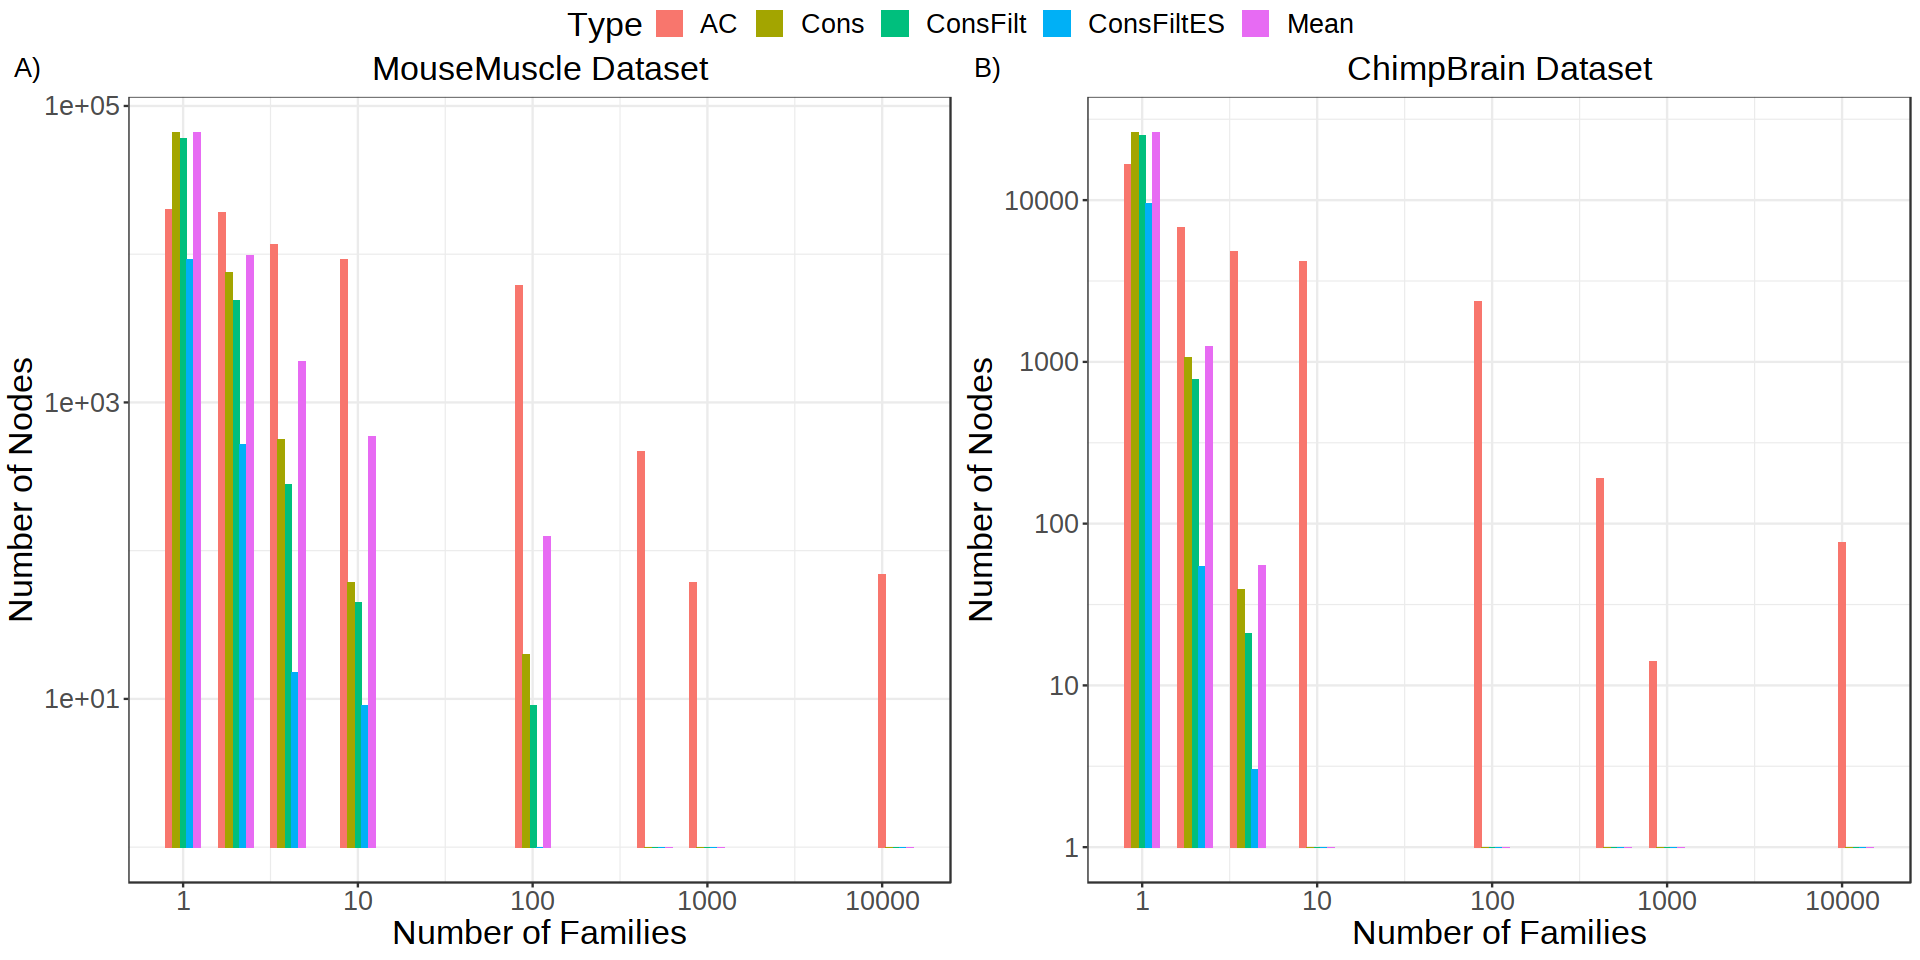

In [83]:
options(repr.plot.width=16, repr.plot.height=8)
ggarrange(pReal, pChimp, common.legend = T, labels=c("A)", "B)"), font.label = list(size=16, face="plain"))

In [ ]:
ggarrange()